In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
Emotions= pd.read_csv('/kaggle/input/emotion/emotion (1).csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,labels
0,-258.990326,132.193741,5.314349,21.521330,-24.357752,-2.237025,-24.086287,-9.530801,-20.967497,-4.285268,...,-0.953883,1.146237,1.829600,2.893938,1.310414,1.626812,2.758013,4.257873,3.918041,male_happy
1,-258.667152,132.047682,5.236842,21.529129,-24.335813,-2.170860,-24.135509,-9.465332,-20.959675,-4.215839,...,-0.906946,1.140402,1.826270,2.867984,1.350153,1.576485,2.766849,4.228887,3.915566,male_happy
2,-301.181824,128.659897,4.380285,9.940308,-23.697367,-7.601327,-25.921268,-13.189119,-19.924520,-0.300373,...,3.321182,3.191138,3.419615,3.112536,1.654553,3.749860,5.546700,4.269989,1.401541,male_happy
3,-274.135437,142.405472,-2.322214,21.200804,-27.737436,-1.496183,-26.762552,-10.112954,-21.643480,-3.658734,...,-1.149690,1.346368,2.298612,3.353943,1.820001,2.129130,2.610373,4.910376,4.944275,male_happy
4,-274.135437,142.405472,-2.322214,21.200804,-27.737436,-1.496183,-26.762552,-10.112954,-21.643480,-3.658734,...,-1.149690,1.346368,2.298612,3.353943,1.820001,2.129130,2.610373,4.910376,4.944275,male_happy


In [3]:
X = Emotions.drop('labels',axis = 1)
Y = Emotions['labels']

In [4]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [5]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,shuffle = True)

In [7]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((48648, 40), (48648, 14), (12162, 40), (12162, 14))

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((48648, 40), (48648, 14), (12162, 40), (12162, 14))

In [9]:
from keras.layers import LSTM,BatchNormalization , GRU

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Embedding

In [11]:
model01=Sequential()
model01.add(LSTM(70,return_sequences=True,input_shape=(40,1)))
model01.add(LSTM(50,return_sequences=True))
model01.add(LSTM(60))
model01.add(Dense(14))
model01.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [12]:
model01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 70)            20160     
                                                                 
 lstm_1 (LSTM)               (None, 40, 50)            24200     
                                                                 
 lstm_2 (LSTM)               (None, 60)                26640     
                                                                 
 dense (Dense)               (None, 14)                854       
                                                                 
Total params: 71,854
Trainable params: 71,854
Non-trainable params: 0
_________________________________________________________________


In [13]:
history=model01.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=65,verbose=1)

Epoch 1/100
749/749 [==============================] - 25s 15ms/step - loss: 0.0538 - accuracy: 0.3580 - val_loss: 0.0498 - val_accuracy: 0.4187
Epoch 2/100
749/749 [==============================] - 10s 13ms/step - loss: 0.0481 - accuracy: 0.4376 - val_loss: 0.0470 - val_accuracy: 0.4505
Epoch 3/100
749/749 [==============================] - 9s 13ms/step - loss: 0.0460 - accuracy: 0.4702 - val_loss: 0.0459 - val_accuracy: 0.4691
Epoch 4/100
749/749 [==============================] - 9s 12ms/step - loss: 0.0446 - accuracy: 0.4898 - val_loss: 0.0447 - val_accuracy: 0.4819
Epoch 5/100
749/749 [==============================] - 9s 12ms/step - loss: 0.0436 - accuracy: 0.5011 - val_loss: 0.0434 - val_accuracy: 0.5012
Epoch 6/100
749/749 [==============================] - 9s 13ms/step - loss: 0.0426 - accuracy: 0.5153 - val_loss: 0.0429 - val_accuracy: 0.5127
Epoch 7/100
749/749 [==============================] - 9s 12ms/step - loss: 0.0419 - accuracy: 0.5251 - val_loss: 0.0422 - val_accurac

In [14]:
print("Accuracy of our model on test data : " , model01.evaluate(x_test,y_test)[1]*100 , "%")

381/381 [==============================] - 2s 5ms/step - loss: 0.0304 - accuracy: 0.7146
Accuracy of our model on test data :  71.46028876304626 %


In [18]:
model_name = 'emotion_lstm_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)   # adds file in folder
model01.save(model_path)
print('Save model and weights at %s' % model_path)
model_json = model01.to_json()
with open('model_json.json', 'w') as json_file:
    json_file.write(model_json)

Save model and weights at /kaggle/working/saved_models/emotion_lstm_model.h5


In [20]:
from keras.models import Sequential, Model, model_from_json

In [27]:
# loading json and model architecture
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('saved_models/emotion_lstm_model.h5')
print('Model is loaded from disk')

# keras optimiser
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.00001, decay=1e-6)
loaded_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose = 0)
print('%s: %.2f%%' % (loaded_model.metrics_names[1], score[1]*100))

Model is loaded from disk
accuracy: 71.46%


In [28]:
predicted = loaded_model.predict(x_test, batch_size = 16, verbose = 1)
predicted = predicted.argmax(axis = 1)
predicted

761/761 [==============================] - 4s 4ms/step


array([ 1, 12, 12, ..., 10,  8, 11])

In [29]:
len(predicted)

12162

In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [43]:
pred_test = model01.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

381/381 [==============================] - 3s 5ms/step


In [68]:

df = pd.DataFrame(columns=['PredictedLabels', 'ActualLabels'])
df['PredictedLabels'] = y_pred.flatten()
df['ActualLabels'] = y_test.flatten()

In [69]:
df

,PredictedLabels,ActualLabels
0,female_disgust,female_disgust
1,male_sad,male_sad
2,male_sad,male_sad
3,female_happy,female_happy
4,male_sad,male_neutral
...,...,...
12157,female_disgust,female_disgust
12158,female_surprise,female_surprise
12159,male_happy,female_happy
12160,male_disgust,female_neutral


In [71]:
df.to_csv('Predictions.csv', index = False)


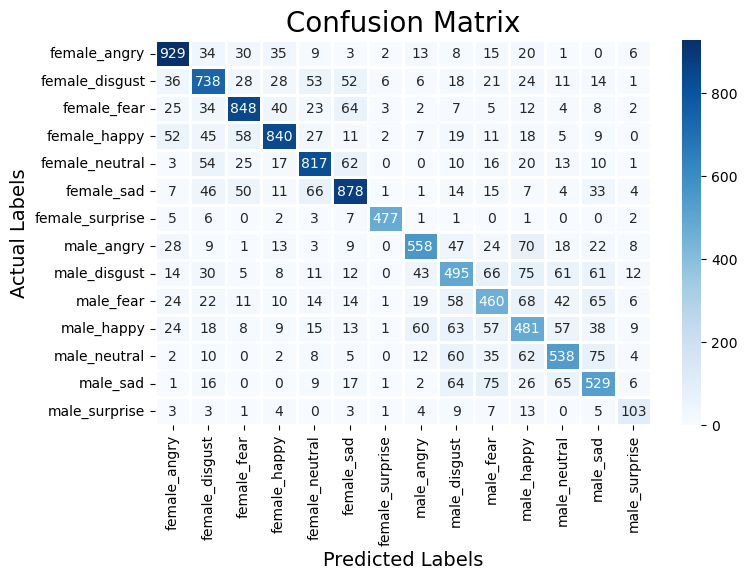

In [58]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

Classification report

In [59]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   female_angry       0.81      0.84      0.82      1105
 female_disgust       0.69      0.71      0.70      1036
    female_fear       0.80      0.79      0.79      1077
   female_happy       0.82      0.76      0.79      1104
 female_neutral       0.77      0.78      0.78      1048
     female_sad       0.76      0.77      0.77      1137
female_surprise       0.96      0.94      0.95       505
     male_angry       0.77      0.69      0.73       810
   male_disgust       0.57      0.55      0.56       893
      male_fear       0.57      0.57      0.57       814
     male_happy       0.54      0.56      0.55       853
   male_neutral       0.66      0.66      0.66       813
       male_sad       0.61      0.65      0.63       811
  male_surprise       0.63      0.66      0.64       156

       accuracy                           0.71     12162
      macro avg       0.71      0.71      0.71     12162
   weighted avg       0.72   

In [60]:
import keras

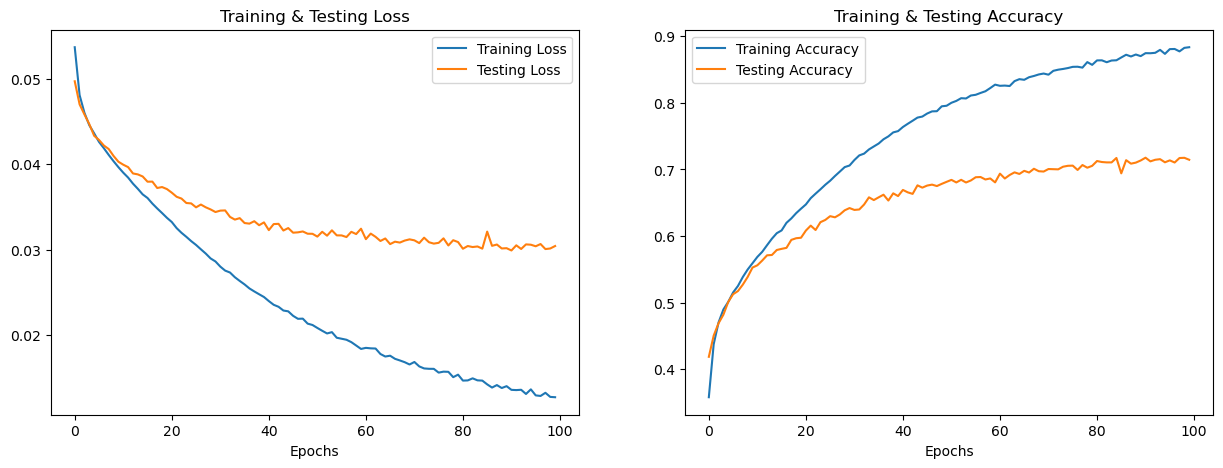

In [61]:

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc =history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(15,5)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()
     

Emotion accuracy

In [72]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.ActualLabels.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })


0.7315408649893109


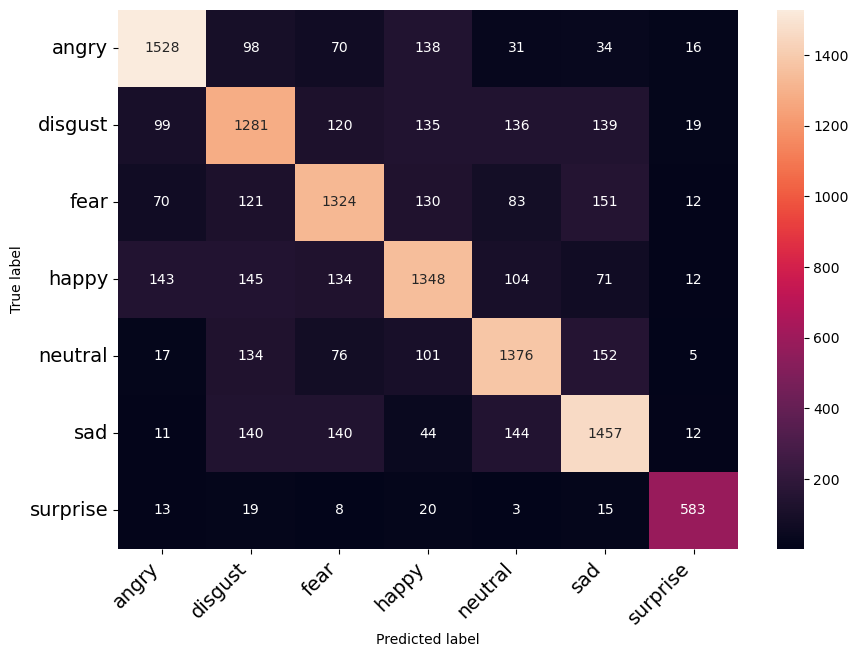

In [79]:
modidf['predictedvalues'] = modidf.PredictedLabels.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_name = classes)

# Classification report 

In [80]:
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.81      0.80      0.81      1915
     disgust       0.66      0.66      0.66      1929
        fear       0.71      0.70      0.70      1891
       happy       0.70      0.69      0.70      1957
     neutral       0.73      0.74      0.74      1861
         sad       0.72      0.75      0.73      1948
    surprise       0.88      0.88      0.88       661

    accuracy                           0.73     12162
   macro avg       0.75      0.75      0.75     12162
weighted avg       0.73      0.73      0.73     12162

